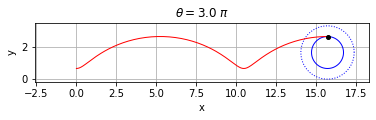

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots()

def update(num):
    if len(round_circles) > 0:
        round_circles.pop().remove()
        round_circles2.pop().remove()
        cycloids.pop().remove()
        points.pop().remove()
        
    round_circle,  = plt.plot(cycloid_c[num]+x,  R+y,  'b:', lw=1)
    round_circle2, = plt.plot(cycloid_c[num]+x2, R+y2, 'b-', lw=1)
    cycloid, = plt.plot(cycloid_x[:num+1] ,cycloid_y[:num+1], 'r-', lw=1)
    point, = plt.plot(cycloid_x[num], cycloid_y[num], 'ko', markersize=4)
    
    round_circles.append(round_circle)
    round_circles2.append(round_circle2)
    cycloids.append(cycloid)
    points.append(point)
    
    theta_str = r'$\theta=$'
    ax.set_title(theta_str + str(theta[num]/np.pi)[:4] + str(r' $\pi$'))

ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_aspect('equal')

#plot data
#e = 0.0935 # mars
#e = 0.9673 # 1P/Halley
e=0.6
a = 1
b = np.sqrt(a**2-e**2)
R = a/e
theta = np.linspace(0,3*np.pi,200)
phi   = np.linspace(0,2*np.pi,100)

x = R*np.cos(phi)
y = R*np.sin(phi)
round_circles =[]

x2 = R*np.cos(phi)*e
y2 = R*np.sin(phi)*e
round_circles2 =[]

cycloid_x = R*e*(1/e*theta-np.sin(theta))
cycloid_y = R*(1-np.cos(theta)*e)
cycloids=[]

cycloid_c = R*theta
points=[]

ani = animation.FuncAnimation(fig, update, 200, interval=100)
HTML(ani.to_html5_video())